In [1]:
from model.dataloader import NinaProDatasetLoader, NearlabDatasetLoader
from model.nina_helper import *
import torch
import pandas as pd
from sklearn.utils import shuffle
from scipy import signal
from model.utils import list_files

In [3]:
from model.model import CNet2D
version="Softmax"
folder_path = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/ninapro/DB2/person1/"

ninapro = NinaProDatasetLoader(folder_path, 1, 2, 512, 128)

X_train, y_train, X_test, y_test = ninapro.load_data(split_method="balanced", test_reps=2)

current_model = CNet2D(version=version, epochs=1, num_classes=50, batch_size=128, dataset_type="NinaPro")
history = current_model.fit(X_train, y_train)


Shape of EMG data: (5238693, 12)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x49152 and 25600x300)

In [7]:
path_nearlab = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features/person1"
file_paths_nearlab = list_files(path_nearlab, "csv")
version = "GMLVQ"
data = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = data.load_data(split_method="repetition_wise")

current_model = CNet2D(version=version, epochs=1, batch_size=128)
history = current_model.fit(X_train, y_train)


Epoch 1/1, Loss: 0.4865


In [2]:
folder_path = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/ninapro/DB2/person1/"

ninapro = NinaProDatasetLoader(folder_path, 1, 2, 400, 40)

X_train, y_train, X_test, y_test = ninapro.load_data(split_method="balanced", test_reps=2)

print(X_train.shape)

torch.Size([88272, 12, 400])


In [10]:
path_nearlab = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features/person1"
file_paths_nearlab = list_files(path_nearlab, "csv")
version = "GMLVQ"
data = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = data.load_data(split_method="repetition_wise")

print(X_train.shape)

torch.Size([4928, 10, 512])


Test Accuracy: 0.8886


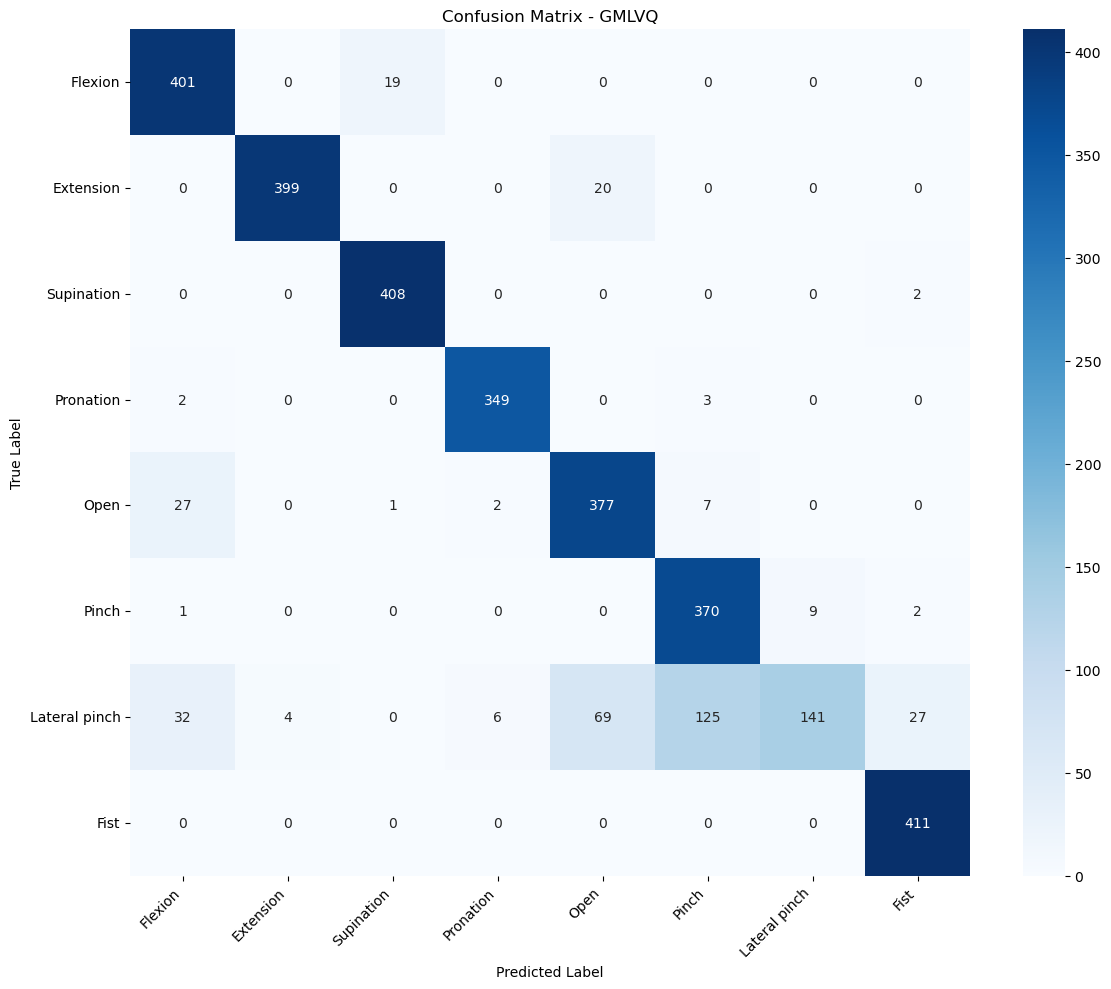


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.87      0.95      0.91       420
    Extension       0.99      0.95      0.97       419
   Supination       0.95      1.00      0.97       410
    Pronation       0.98      0.99      0.98       354
         Open       0.81      0.91      0.86       414
        Pinch       0.73      0.97      0.83       382
Lateral pinch       0.94      0.35      0.51       404
         Fist       0.93      1.00      0.96       411

     accuracy                           0.89      3214
    macro avg       0.90      0.89      0.87      3214
 weighted avg       0.90      0.89      0.87      3214


Per-class Accuracy:
Flexion: 0.9548
Extension: 0.9523
Supination: 0.9951
Pronation: 0.9859
Open: 0.9106
Pinch: 0.9686
Lateral pinch: 0.3490
Fist: 1.0000


{'accuracy': 0.8886123299598694,
 'confusion_matrix': array([[401,   0,  19,   0,   0,   0,   0,   0],
        [  0, 399,   0,   0,  20,   0,   0,   0],
        [  0,   0, 408,   0,   0,   0,   0,   2],
        [  2,   0,   0, 349,   0,   3,   0,   0],
        [ 27,   0,   1,   2, 377,   7,   0,   0],
        [  1,   0,   0,   0,   0, 370,   9,   2],
        [ 32,   4,   0,   6,  69, 125, 141,  27],
        [  0,   0,   0,   0,   0,   0,   0, 411]]),
 'per_class_accuracy': array([0.9547619 , 0.9522673 , 0.99512195, 0.98587571, 0.91062802,
        0.96858639, 0.3490099 , 1.        ]),
 'predictions': [1,
  5,
  4,
  5,
  2,
  0,
  5,
  4,
  4,
  1,
  1,
  7,
  7,
  1,
  7,
  7,
  2,
  2,
  5,
  2,
  4,
  0,
  0,
  0,
  2,
  7,
  2,
  0,
  6,
  0,
  0,
  7,
  0,
  5,
  7,
  7,
  0,
  5,
  3,
  3,
  1,
  3,
  0,
  7,
  1,
  7,
  2,
  5,
  1,
  6,
  6,
  7,
  0,
  6,
  5,
  0,
  7,
  0,
  1,
  5,
  3,
  2,
  4,
  5,
  5,
  3,
  3,
  2,
  4,
  7,
  3,
  1,
  7,
  4,
  5,
  7,
  3,
  7,
  3,

In [8]:
current_model.evaluate_model(X_test, y_test)